This notebook demonstrates some basic data exploration and analysis techniques in *pandas*, a popular Python package. It uses data from a coding interview I once did while interviewing with a company called ZipJet in Berlin. They wanted to be the Uber for laundry, or something.

First, lets import some packages. You'll need to have *pandas*, *numpy*, and *matplotlib* installed, but the other packages will come standard with Python

In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt


## Basic Access - Reading in Data, Selecting Rows and Columns

Now let's read in some data from the CSV they provided. We will convert some of the fields to datetime objects to make them a little easier to deal with - don't worry about that too much for now

In [2]:
demand = pd.read_csv("C:\\Users\\wyseg\\Downloads\\test_case_zipjet\\test_case_zipjet\\data\demand.csv")
demand['day'] = pd.to_datetime(demand['day'])
demand['day_of_week'] = demand.day.dt.dayofweek

We can take a quick peek at the first few rows of our data using the .head() method, just to see how it looks

In [3]:
demand.head()

,day,shift,num_pickups,day_of_week
0,2018-08-08,MS,61,2
1,2018-02-14,MS,75,2
2,2018-05-09,MS,110,2
3,2018-06-04,MS,67,0
4,2018-07-03,MS,59,1


In [4]:
demand.to_csv("demand.csv") # we can easily plot 

In pandas, the object we've named *demand* is called a DataFrame, and it contains table-like data, like what you're familiar with seeing in Excel or a CSV. Each column of data in the DataFrame is a Series object. 

We can select a subset of the columns of our DataFrame like this...

In [5]:
demand[['day','shift','num_pickups']]

,day,shift,num_pickups
0,2018-08-08,MS,61
1,2018-02-14,MS,75
2,2018-05-09,MS,110
3,2018-06-04,MS,67
4,2018-07-03,MS,59
...,...,...,...
218,2018-05-09,ES,20
219,2018-01-27,MS,32
220,2018-06-02,MS,35
221,2018-07-25,ES,30


...or pull out just a single column like this

In [6]:
demand['num_pickups']

0       61
1       75
2      110
3       67
4       59
      ... 
218     20
219     32
220     35
221     30
222      1
Name: num_pickups, Length: 223, dtype: int64

In [7]:
demand.num_pickups # we can also access existing columns like this

0       61
1       75
2      110
3       67
4       59
      ... 
218     20
219     32
220     35
221     30
222      1
Name: num_pickups, Length: 223, dtype: int64

We can also make new columns, or modify old ones like so

In [8]:
demand['double_pickups'] = demand['num_pickups'] * 2
demand.head()

,day,shift,num_pickups,day_of_week,double_pickups
0,2018-08-08,MS,61,2,122
1,2018-02-14,MS,75,2,150
2,2018-05-09,MS,110,2,220
3,2018-06-04,MS,67,0,134
4,2018-07-03,MS,59,1,118


We can also transform a column using the .apply method, and passing in a function. If you're familiar with the R/tidyverse, you'll find this similar to the *mutate* command. 

In [9]:
# this defines a new function
def add_one(x):
    return x + 1

demand['pickups_plus_one'] = demand['num_pickups'].apply(add_one)
demand[['num_pickups','pickups_plus_one']].head()

,num_pickups,pickups_plus_one
0,61,62
1,75,76
2,110,111
3,67,68
4,59,60


That was cool, but we don't really need those columns - so let's drop them

In [10]:
demand = demand.drop(['pickups_plus_one','double_pickups'], axis=1) # axis=1 means to drop columns. axis=0 will drop rows

There are several ways of selecting rows in a pandas dataframe. The first uses the iloc method, where you reference the individual indices of the rows and columns you'd like. Use just a colon if you'd like to pull out all the columns or all the rows. 

In [11]:
# this will select the first 5 rows, and all the columns
demand.iloc[0:5,:]

,day,shift,num_pickups,day_of_week
0,2018-08-08,MS,61,2
1,2018-02-14,MS,75,2
2,2018-05-09,MS,110,2
3,2018-06-04,MS,67,0
4,2018-07-03,MS,59,1


We can also use the .loc method, which will look at the column names and index names

In [12]:
demand.loc[[0,1,2,3], ['day','shift']]

,day,shift
0,2018-08-08,MS
1,2018-02-14,MS
2,2018-05-09,MS
3,2018-06-04,MS


Finally, we can select subsets of rows that satisfy a particular criteria, like this

In [13]:
# this will select all the columns, for rows where num_pickups is less than 20
demand[demand['num_pickups']<20]

,day,shift,num_pickups,day_of_week
150,2017-12-29,MS,19,4
213,2018-03-21,ES,16,2
222,2018-05-11,ES,1,4


The company told me that the *shift* column represents either morning shift (MS) or evening shift (ES). We can see how many observations we have of each by selecting the *shift* column and using the .value_counts() method:

In [14]:
demand['shift'].value_counts()

MS    152
ES     71
Name: shift, dtype: int64

Let's make a new DataFrame with only the morning shift observations.

In [15]:
morning = demand[demand['shift']=='MS']

## Plotting


Let's plot some data! In order to make them show up correctly in our Jupyter notebook, we need to use the
%matplotlib inline 
magic command. This is only necessary in Jupyter notebooks, it won't work in regular Python (but the plotting will still work fine). 

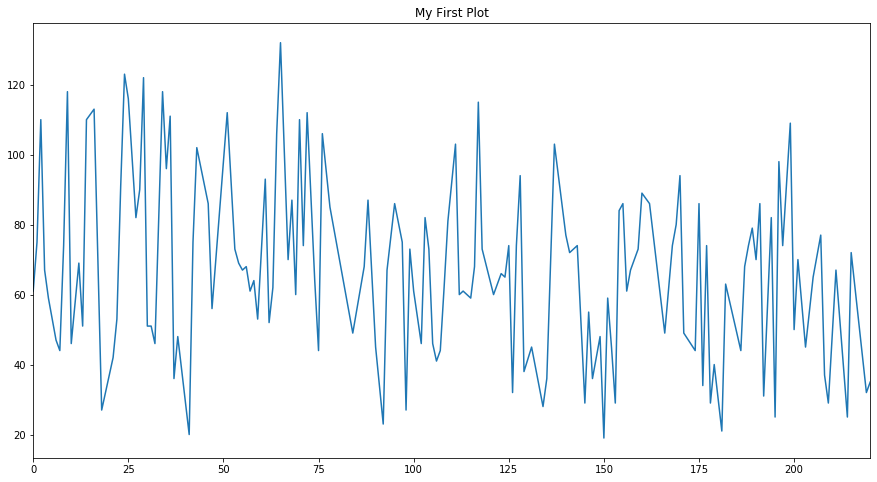

In [16]:
%matplotlib inline
morning['num_pickups'].plot(figsize=(15,8), title="My First Plot") # by default, we'll get a line chart of ordered observations

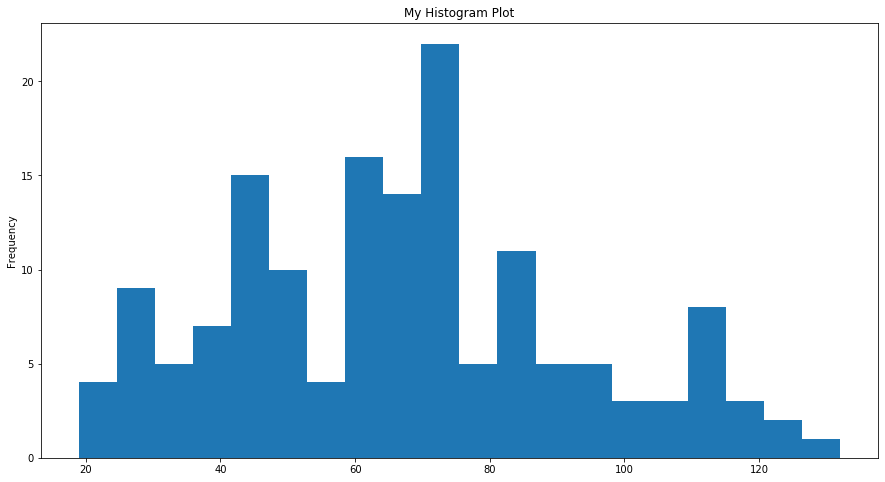

In [17]:
# We can also make other plots like this
morning['num_pickups'].plot(figsize=(15,8), kind='hist', bins=20, title="My Histogram Plot") 

### Customization

Here we can customize things like our color, linewidth, axis labels, etc

Text(0, 0.5, 'Number of Pickups')

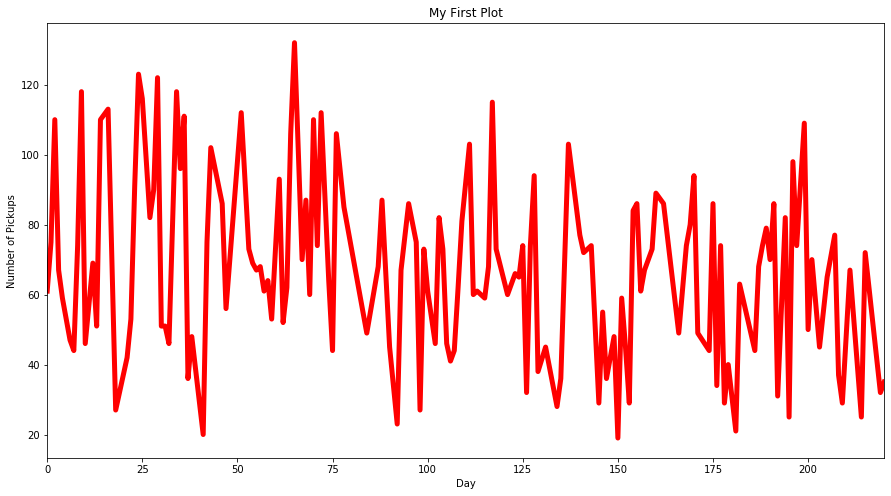

In [18]:
morning['num_pickups'].plot(figsize=(15,8), title="My First Plot", linewidth=5, color='red'
                           ) # by default, we'll get a line chart of ordered observations
plt.xlabel("Day")
plt.ylabel("Number of Pickups")

Note that we use the figsize=(15,8) argument to make a nicely-sized chart on most monitors. You can change this if you like. 
If you'd like to output multiple graphs in a loop, you can do it by creating individual plots, as below:

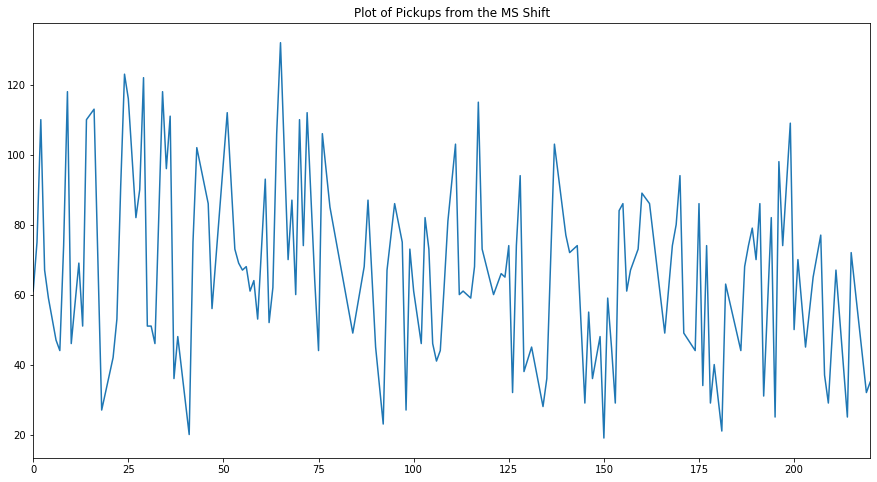

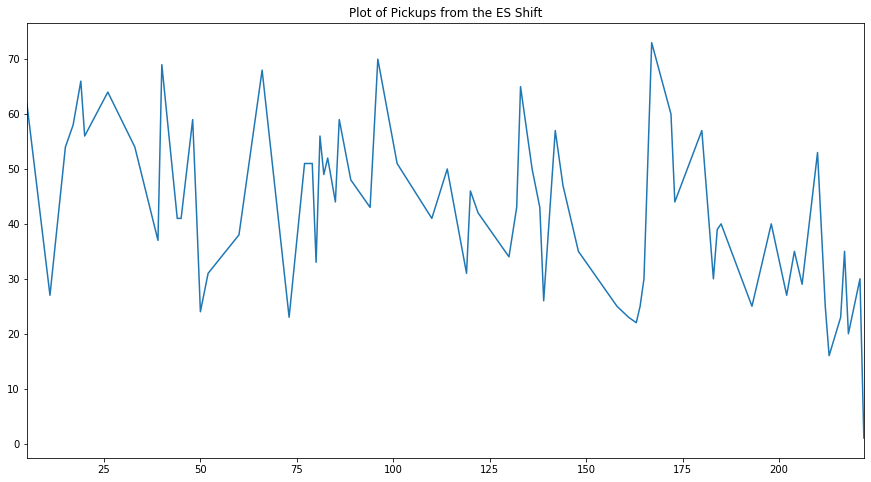

In [19]:
for shift_type in ['MS','ES']:
    plt.figure(figsize=(15,8))
    df = demand[demand['shift']==shift_type] # get a subset of the data
    formatted_title = "Plot of Pickups from the {} Shift".format(shift_type) # this formats a string
    df['num_pickups'].plot(title=formatted_title)

## Reshaping Data - Pivot, groupby, and aggregate

It would be kind of nice if we knew how many pickups happened on each day, so we'll **pivot** our data. We'll transform it so that each row will represent a date, each column will be a different type of shift (MS or ES)

In [20]:
demand_piv = demand.pivot_table(index='day', columns='shift', values='num_pickups')
demand_piv.head()

shift,ES,MS
day,,
2017-12-01,NaN,67.0
2017-12-02,NaN,48.0
2017-12-04,60.0,86.0
2017-12-06,40.0,74.0
2017-12-08,NaN,56.0


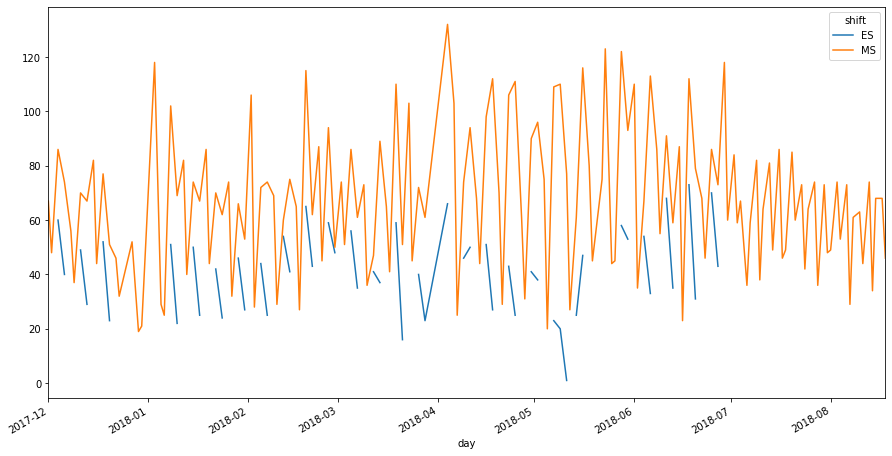

In [21]:
# we can also plot the dataframe
demand_piv.plot(figsize=(15,8))

It looks like we have some NaN (not a number) values for days where there wasn't a morning/evening shift. Let's fill those in with zeros...

In [22]:
demand_piv = demand_piv.fillna(0.)
demand_piv.head()

shift,ES,MS
day,,
2017-12-01,0.0,67.0
2017-12-02,0.0,48.0
2017-12-04,60.0,86.0
2017-12-06,40.0,74.0
2017-12-08,0.0,56.0


In [23]:
demand_piv['total'] = demand_piv.sum(axis=1) # let's attach a 'total' column that's the sum of MS and ES
demand_piv.head()

shift,ES,MS,total
day,,,
2017-12-01,0.0,67.0,67.0
2017-12-02,0.0,48.0,48.0
2017-12-04,60.0,86.0,146.0
2017-12-06,40.0,74.0,114.0
2017-12-08,0.0,56.0,56.0


Note that now our *index* has changed, which is basically the name provided to each row - it's the column shown on the left, in bold. Earlier, the index was just numbers starting at zero...

In [24]:
morning.head()

,day,shift,num_pickups,day_of_week
0,2018-08-08,MS,61,2
1,2018-02-14,MS,75,2
2,2018-05-09,MS,110,2
3,2018-06-04,MS,67,0
4,2018-07-03,MS,59,1


...But now it's a bunch of dates

In [25]:
demand_piv.head() # 

shift,ES,MS,total
day,,,
2017-12-01,0.0,67.0,67.0
2017-12-02,0.0,48.0,48.0
2017-12-04,60.0,86.0,146.0
2017-12-06,40.0,74.0,114.0
2017-12-08,0.0,56.0,56.0


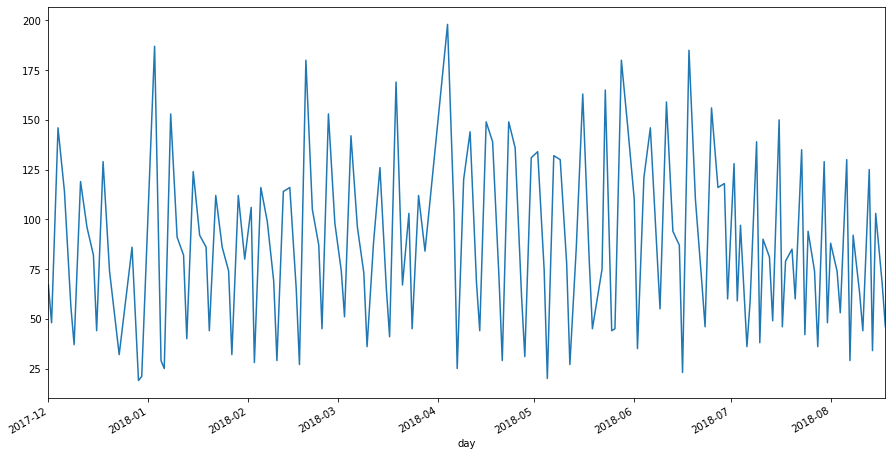

In [26]:
## we can plot our total values here
demand_piv['total'].plot(figsize=(15,8))

At this point, we start to notice what looks like a weekly trend in the data. So we ask ourself - which days of the week are most popular? To answer this, we first need to add a 'weekday' column by extracting it from our index

In [27]:
demand_piv['weekday'] = demand_piv.index.day_name() # we're able to run this only because our index is a date
demand_piv.head()

shift,ES,MS,total,weekday
day,,,,
2017-12-01,0.0,67.0,67.0,Friday
2017-12-02,0.0,48.0,48.0,Saturday
2017-12-04,60.0,86.0,146.0,Monday
2017-12-06,40.0,74.0,114.0,Wednesday
2017-12-08,0.0,56.0,56.0,Friday


Now let's find the average pickups on each day - we'll do this by first grouping our data using the ```groupby``` method and then aggregating it using the ```mean``` method:

In [28]:
weekly_average = demand_piv.groupby('weekday').mean()
weekly_average

shift,ES,MS,total
weekday,,,
Friday,0.027027,73.270270,73.297297
Monday,51.848485,83.696970,135.545455
Saturday,0.000000,39.378378,39.378378
Tuesday,0.000000,46.375000,46.375000
Wednesday,34.918919,77.540541,112.459459


In [29]:
weekly_average = weekly_average.rename(columns={"total":"average_total"})

There are several other aggregation methods we can use, like ```count``` or ```sum```. We can specify custom aggregation functions as well using the `agg` method

Read more about aggregating [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#aggregation)

In [30]:
demand_piv.groupby('weekday').agg({'total':'sum','ES':'count'})

,total,ES
weekday,,
Friday,2712.0,37
Monday,4473.0,33
Saturday,1457.0,37
Tuesday,371.0,8
Wednesday,4161.0,37


Now let's do some data analysis. 

In [31]:
# First, we're going to join together two datasets 
merged = pd.merge(demand_piv, weekly_average[['average_total']], left_on='weekday', right_index=True)
merged

shift,ES,MS,total,weekday,average_total
day,,,,,
2017-12-01,0.0,67.0,67.0,Friday,73.297297
2017-12-08,0.0,56.0,56.0,Friday,73.297297
2017-12-15,0.0,82.0,82.0,Friday,73.297297
2017-12-22,0.0,46.0,46.0,Friday,73.297297
2017-12-29,0.0,19.0,19.0,Friday,73.297297
...,...,...,...,...,...
2018-07-17,0.0,46.0,46.0,Tuesday,46.375000
2018-07-24,0.0,42.0,42.0,Tuesday,46.375000
2018-07-31,0.0,48.0,48.0,Tuesday,46.375000


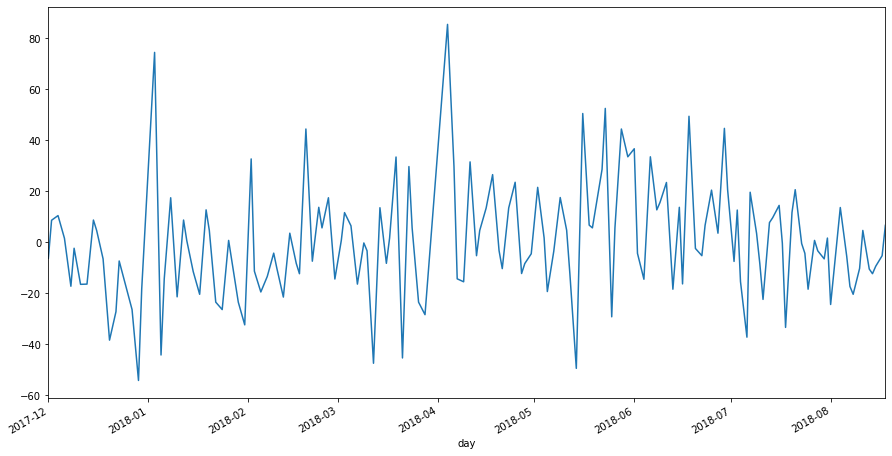

In [32]:
# now let's see how much each day deviates from the average for that weekday
merged['diff_from_average'] = merged['total']-merged['average_total']
merged['diff_from_average'].plot(figsize=(15,8))